# Análisis exploratorio de datos. Terremotos en los ultimos 19 años.

##### A continuación

### Cargar el archivo CSV
En esta celda, se importa el archivo `clean_earthquakes.csv` desde el directorio `data/processed`. 
Se utiliza la biblioteca `pandas` para cargar los datos en un DataFrame llamado `df`.

- **`Path(os.getcwd())`**: Obtiene el directorio actual de trabajo.


In [122]:
#codigo para cargar el csv en jupyter
import pandas as pd
from pathlib import Path
import os
# Obtener la ruta del directorio actual (sin usar __file__)
current_dir = Path(os.getcwd())  # Obtiene el directorio actual de trabajo

# Construir la ruta relativa al archivo CSV
clean_csv_path = current_dir.parents[1] / 'data' / 'processed' / 'clean_earthquakes.csv'

# Cargar el CSV
df = pd.read_csv(clean_csv_path)
df.head()


,Date & Time UTC,Lat. degrees,Lon. degrees,Depth km,Region,Magnitude,Network,Country,Lat_adj,Lon_adj
0,2025-04-01 23:59:55.800,26.467,128.814,10,RYUKYU ISLANDS,5.1,SC4,JAPAN,26.467000,128.814010
1,2025-04-01 23:59:55.000,26.210,128.630,10,RYUKYU ISLANDS,5.1,BEO,JAPAN,26.210009,128.630007
2,2025-04-01 23:59:54.700,26.118,128.556,10,RYUKYU ISLANDS,5.1,GFZ,JAPAN,26.118004,128.556008
3,2025-04-01 23:59:54.100,26.060,128.500,10,RYUKYU ISLANDS,5.1,AUST,JAPAN,26.060001,128.500005
4,2025-04-01 23:59:53.700,26.020,128.510,10,RYUKYU ISLANDS,5.2,GSRAS,JAPAN,26.020004,128.510007


### Estadísticas descriptivas
En la siguiente celda, se utiliza el método `df.describe()` para generar estadísticas descriptivas de las columnas numéricas del DataFrame.

- **Propósito**: Obtener información como el promedio, desviación estándar, valores mínimos y máximos, y los percentiles de las columnas numéricas.

In [123]:
#mostramos todos los valores nulos
df.isnull().sum()

Date & Time UTC         0
Lat. degrees            0
Lon. degrees            0
Depth km                0
Region                  3
Magnitude               0
Network               513
Country            790602
Lat_adj                 0
Lon_adj                 0
dtype: int64

#### La primera pregunta que nos puede surgir con estos datos puede ser: ¿Hay algún patron relacionado con las magnitudes de los terremotos?
#### Para responder a esto podemos crear un histograma que represente la distribucion de los terremotos en funcion de la magnitud.

### Histograma de magnitudes
Aqui, generamos un histograma para visualizar la distribución de las magnitudes de los terremotos.

- **`np.arange()`**: Crea los límites de los bins (intervalos) con un paso de 0.1.
- **`sns.histplot()`**: Genera el histograma utilizando la biblioteca `Seaborn`.
- **Configuración**:
  - `bins`: Define los intervalos de las magnitudes.
  - `color`: Establece el color de las barras.
  - `kde=False`: Desactiva la curva de densidad.
- **Propósito**: Visualizar la frecuencia de los terremotos según su magnitud.

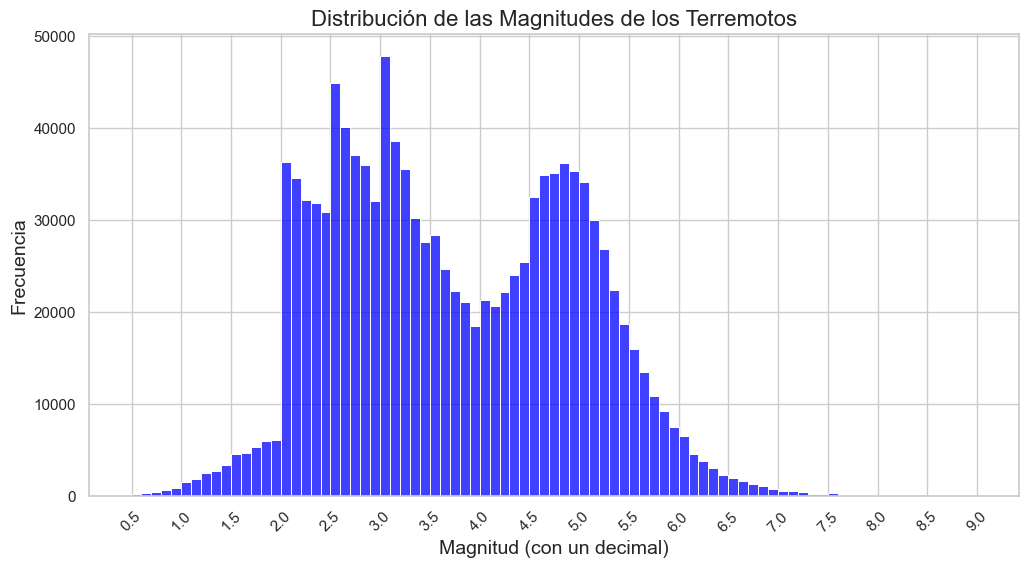

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear los límites de los bins (de 0.0 a 10.0 con pasos de 0.1)
bins = np.arange(df['Magnitude'].min(), df['Magnitude'].max() + 0.1, 0.1)

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Magnitude', bins=bins, color='blue', kde=False)

# Configurar el título y las etiquetas
plt.title('Distribución de las Magnitudes de los Terremotos', fontsize=16)
plt.xlabel('Magnitud (con un decimal)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar la gráfica
plt.xticks(ticks=np.arange(df['Magnitude'].min(), df['Magnitude'].max() + 0.5, 0.5), rotation=45)
plt.show()

##### En este histograma podemos ver un incremento repentino de la frecuencia de los terremotos al alcanzar ciertas magnitudes, concretamente magnitudes de 2, 2,5 y 3.

##### Esto podría ser porque algunas redes de sismógrafos solo registran terremotos de cierta magnitud.

##### Para comprobarlo, crearemos dos funciones. Una de ellas para comprobar cuantas redes SOLO registran terremotos de cierta magnitud o superiores y otra para ver cuales solo registran terremotos menores a cierta magnitud.

### Redes que registran terremotos de magnitud ≥ 3, 2.5 y 2
En esta celda, se calcula cuántas redes registran exclusivamente terremotos de magnitud mayor o igual a 3, 2.5 y 2.

- **`redes_solo_mayores()`**:
  - Filtra las redes que solo tienen terremotos con magnitudes mayores o iguales al límite especificado.
  - Calcula cuántas redes cumplen esta condición y cuántas no.
- **Resultados**:
  - Se imprimen los resultados para cada límite de magnitud.

In [137]:
# Función para calcular redes que solo registran terremotos con magnitud >= límite
def redes_solo_mayores(df, limite):
    redes_solo = df.groupby('Network').filter(lambda x: x['Magnitude'].min() >= limite)['Network'].nunique()
    total_redes = df['Network'].nunique()
    redes_no_solo = total_redes - redes_solo
    return redes_solo, redes_no_solo


#Calcular para magnitud >= 4.5
redes_4_5, redes_no_4_5 = redes_solo_mayores(df, 4.5)

# Calcular para magnitud >= 3
redes_3, redes_no_3 = redes_solo_mayores(df, 3)

# Calcular para magnitud >= 2.5
redes_2_5, redes_no_2_5 = redes_solo_mayores(df, 2.5)

# Calcular para magnitud >= 2
redes_2, redes_no_2 = redes_solo_mayores(df, 2)

# Mostrar los resultados

# Mostrar el numero total de redes
total_redes = df['Network'].nunique()
print(f"Total de redes: {total_redes}\n")

print(f"Redes que SOLO registran terremotos de magnitud 4.5 o más: {redes_4_5}")
print(f"Redes que registran terremotos de magnitud menor a 4.5: {redes_no_4_5}\n")

print(f"Redes que SOLO registran terremotos de magnitud 3 o más: {redes_3}")
print(f"Redes que registran terremotos de magnitud menor a 3: {redes_no_3}\n")

print(f"Redes que SOLO registran terremotos de magnitud 2.5 o más: {redes_2_5}")
print(f"Redes que registran terremotos de magnitud menor a 2.5: {redes_no_2_5}\n")

print(f"Redes que SOLO registran terremotos de magnitud 2 o más: {redes_2}")
print(f"Redes que registran terremotos de magnitud menor a 2: {redes_no_2}\n")



Total de redes: 249

Redes que SOLO registran terremotos de magnitud 4.5 o más: 11
Redes que registran terremotos de magnitud menor a 4.5: 238

Redes que SOLO registran terremotos de magnitud 3 o más: 63
Redes que registran terremotos de magnitud menor a 3: 186

Redes que SOLO registran terremotos de magnitud 2.5 o más: 90
Redes que registran terremotos de magnitud menor a 2.5: 159

Redes que SOLO registran terremotos de magnitud 2 o más: 156
Redes que registran terremotos de magnitud menor a 2: 93



### Redes que registran terremotos de magnitud < 3, 2.5 y 2
En esta celda, se calcula cuántas redes registran exclusivamente terremotos de magnitud menor a 3, 2.5 y 2.

- **`redes_solo_menores()`**:
  - Filtra las redes que solo tienen terremotos con magnitudes menores al límite especificado.
  - Devuelve una lista de redes que cumplen esta condición.
- **Resultados**:
  - Se imprimen los resultados para cada límite de magnitud.

In [126]:
# Función para calcular redes que solo registran terremotos con magnitud < límite
def redes_solo_menores(df, limite):
    redes_solo = df.groupby('Network').filter(lambda x: x['Magnitude'].max() < limite)['Network'].unique()
    return redes_solo

# Calcular para magnitud < 3
redes_menores_3 = redes_solo_menores(df, 3)

# Calcular para magnitud < 2.5
redes_menores_2_5 = redes_solo_menores(df, 2.5)

# Calcular para magnitud < 2
redes_menores_2 = redes_solo_menores(df, 2)

# Mostrar los resultados
print(f"Redes que SOLO registran terremotos de magnitud menor a 3: {len(redes_menores_3)}")
print(f"Redes que SOLO registran terremotos de magnitud menor a 2.5: {len(redes_menores_2_5)}")
print(f"Redes que SOLO registran terremotos de magnitud menor a 2: {len(redes_menores_2)}")

Redes que SOLO registran terremotos de magnitud menor a 3: 21
Redes que SOLO registran terremotos de magnitud menor a 2.5: 9
Redes que SOLO registran terremotos de magnitud menor a 2: 2


##### Viendo los resultados de estas funciones, observamos que hay un numero considerable de redes que ignoran terremotos pequeños. Lo cual provoca esos saltos tab abruptos en la gráfica.
##### Tambien hay algunas redes que ignoran algunos terrmotos mas fuertes pero el numero es mucho menor y, por ello, el salto en la gráfica es menos perceptible.

#### ¿Influye la latitud en la frecuencia de los terremotos?
##### Para comprobar sis e producen mas terremotos cerca del ecuador o de las zonas polares, podemos empeazr mostrandolo en un gráfico.

### Distribución de terremotos por el valor absoluto de la latitud
En esta celda, se analiza la distribución de los terremotos según el valor absoluto de la latitud

- **Pasos**:
  1. Se crea una nueva columna `Abs_Latitude` con el valor absoluto de la latitud.
  2. Se agrupan los datos en intervalos (`bins`) de latitud absoluta.
  3. Se cuenta la cantidad de terremotos en cada intervalo.
- **Gráfica**:
  - Se genera un gráfico de barras para visualizar la cantidad de terremotos en cada intervalo del valor absoluto de la latitud

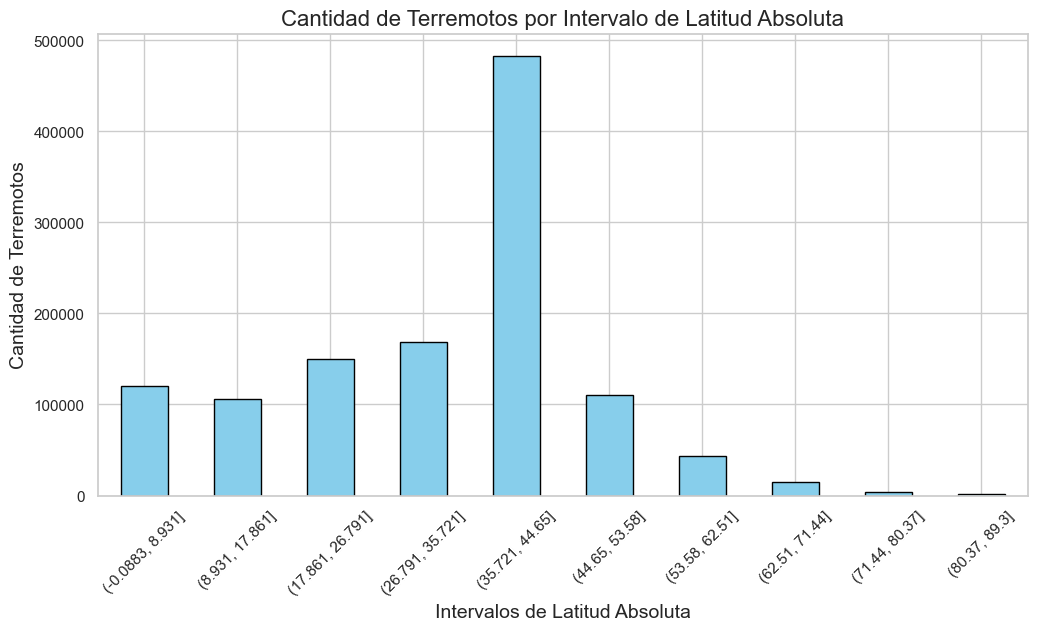

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear una nueva columna con el valor absoluto de la latitud
df['Abs_Latitude'] = df['Lat. degrees'].abs()

# Crear intervalos de latitud absoluta
df['Abs_Latitude_Bins'] = pd.cut(df['Abs_Latitude'], bins=10)  # Dividimos en 10 intervalos

# Contar terremotos por intervalo de latitud absoluta
abs_latitude_counts = df['Abs_Latitude_Bins'].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(12, 6))
abs_latitude_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Terremotos por Intervalo de Latitud', fontsize=16)
plt.xlabel('Intervalos de Latitud Absoluta', fontsize=14)
plt.ylabel('Cantidad de Terremotos', fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Aqui podemos observar dos cosas interesantes:
- En las latitudes mas altas los terremotos parecen reducirse
- Aparentemente, hay un gran aumento de los terremotos entre las latitudes absolutas 35 y 45.
##### Es posible que, al igual que en el caso de la magnitud, haya redes que solo registran terremotos que ocurren entre dichas latitudes. Y para comprobarlo podemos hacer algo parecido a lo anterior.

In [128]:
# Función para filtrar redes que solo registran terremotos dentro de un rango de latitudes absolutas
def redes_solo_en_rango_latitudes(df, min_latitude, max_latitude):
    redes_en_rango = df.groupby('Network').filter(
        lambda x: x['Lat. degrees'].abs().min() >= min_latitude and x['Lat. degrees'].abs().max() <= max_latitude
    )['Network'].unique()
    return redes_en_rango

# Definir el rango de latitudes absolutas
min_latitude = 35.721
max_latitude = 44.65

# Obtener las redes que cumplen con la condición
redes_en_rango = redes_solo_en_rango_latitudes(df, min_latitude, max_latitude)

# Mostrar los resultados
print(f"Redes que SOLO registran terremotos con latitudes absolutas entre {min_latitude} y {max_latitude}:")
print(f"Cantidad de redes: {len(redes_en_rango)}")
print(f"Lista de redes: {redes_en_rango}")

Redes que SOLO registran terremotos con latitudes absolutas entre 35.721 y 44.65:
Cantidad de redes: 14
Lista de redes: ['PDA*' 'SOF*' 'NSSP' 'IGEO*' 'RSSC*' 'KIS*' 'NSSP*' 'SORS*' 'MSO*' 'TIF*'
 'ICGC' 'CSEM*' 'OCA*' 'ERD']


##### Viendo que solo hay 14 redes que registren terremotos exclusivamente en esas latitudes debemos ver si el promedio de teremotos registrados por ellas es mayor...

In [129]:
# Función para filtrar redes que solo registran terremotos dentro de un rango de latitudes absolutas
def redes_solo_en_rango_latitudes(df, min_latitude, max_latitude):
    redes_en_rango = df.groupby('Network').filter(
        lambda x: x['Lat. degrees'].abs().min() >= min_latitude and x['Lat. degrees'].abs().max() <= max_latitude
    )['Network'].unique()
    return redes_en_rango

# Definir el rango de latitudes absolutas
min_latitude = 35.721
max_latitude = 44.65

# Obtener las redes que cumplen con la condición
redes_en_rango = redes_solo_en_rango_latitudes(df, min_latitude, max_latitude)

# Calcular el promedio de terremotos registrados por esas redes
promedio_redes_en_rango = df[df['Network'].isin(redes_en_rango)].groupby('Network').size().mean()

# Calcular el promedio de terremotos registrados por las demás redes
promedio_otras_redes = df[~df['Network'].isin(redes_en_rango)].groupby('Network').size().mean()

# Mostrar los resultados
print(f"Promedio de terremotos registrados por redes en el rango de latitudes absolutas ({min_latitude}, {max_latitude}): {promedio_redes_en_rango:.2f}")
print(f"Promedio de terremotos registrados por las demás redes: {promedio_otras_redes:.2f}")

Promedio de terremotos registrados por redes en el rango de latitudes absolutas (35.721, 44.65): 130.86
Promedio de terremotos registrados por las demás redes: 5099.69


##### Aqui vemos que el promedio de terremotos registrados por estas 14 redes es de ehcho muy inferior al resto. Esto parece descartar un sesgo en las mediciones, confirmando así que si se producen mas terremotos cerca de esas latitudes.

##### A continuación constrastaremos la siguiente hipotesis: A mayor profundidad del terremoto, mayor magnitud (existe una relación positiva entre profundidad y magnitud).

### Gráfico de dispersión: Relación entre profundidad y magnitud
En esta celda, se genera un gráfico de dispersión para visualizar la relación entre la profundidad (`Depth km`) y la magnitud (`Magnitude`) de los terremotos.

- **`sns.scatterplot()`**:
  - `x='Depth km'`: Eje X representa la profundidad.
  - `y='Magnitude'`: Eje Y representa la magnitud.
  - `alpha=0.7`: Ajusta la transparencia de los puntos.
- **Propósito**: Identificar visualmente si existe una relación entre la profundidad y la magnitud.

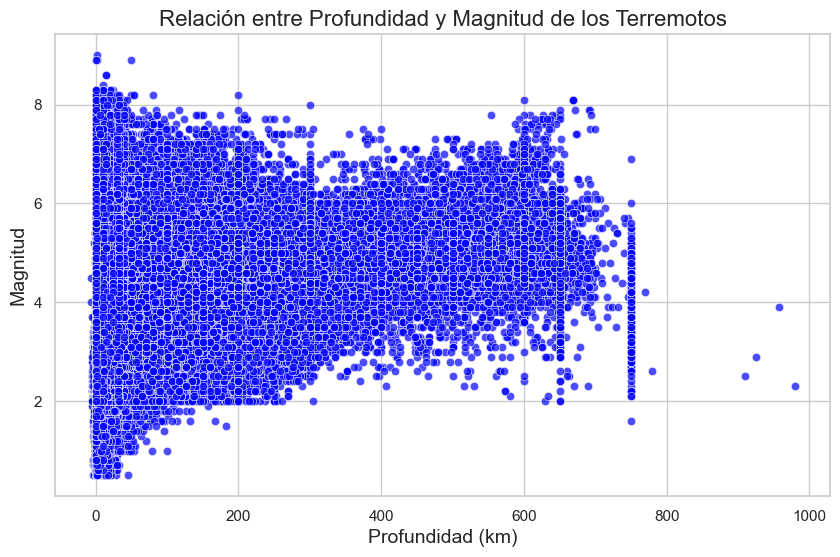

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depth km', y='Magnitude', alpha=0.7, color='blue')

# Configurar el título y las etiquetas
plt.title('Relación entre Profundidad y Magnitud de los Terremotos', fontsize=16)
plt.xlabel('Profundidad (km)', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)

# Mostrar la gráfica
plt.show()

##### Podemos observar en este grafico. Hay muchos terremotos agrupados en profundidades como 650 o 750 km. Esto se debe a que, en ocasiones, no se puede medir exactamente la profundidad y se debe estimar.

In [131]:
import statsmodels.api as sm

# Crear el modelo de regresión lineal
X = df['Depth km']
y = df['Magnitude']
X = sm.add_constant(X)  # Agregar una constante para el modelo

model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                 8.033e+04
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:55:56   Log-Likelihood:            -1.9024e+06
No. Observations:             1200773   AIC:                         3.805e+06
Df Residuals:                 1200771   BIC:                         3.805e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5459      0.001   2973.407      0.0

In [132]:
from scipy.stats import pearsonr

# Calcular la correlación entre profundidad y magnitud
correlation, p_value = pearsonr(df['Depth km'], df['Magnitude'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre la profundidad y la magnitud.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la profundidad afecta la magnitud.")

Coeficiente de correlación de Pearson: 0.2504068919503965
Valor p: 0.0
Rechazamos la hipótesis nula: Existe una relación significativa entre la profundidad y la magnitud.


##### Podemos llegar a la conclusion de que los terremotos originados a mayor profundidad tienden a ser mas potentes y por tanto, la profundidad y la magnitud del terremoto se correlacionan.

#### Por último, vamos a visualizar la frecuencia de los terremotos de distintas magnitudes y, para ello, crearemos un grafico que nos muestre cuánto tiempo pasa entre un terremoto de una magnitud x y otro de la misma magnitud o mayor.

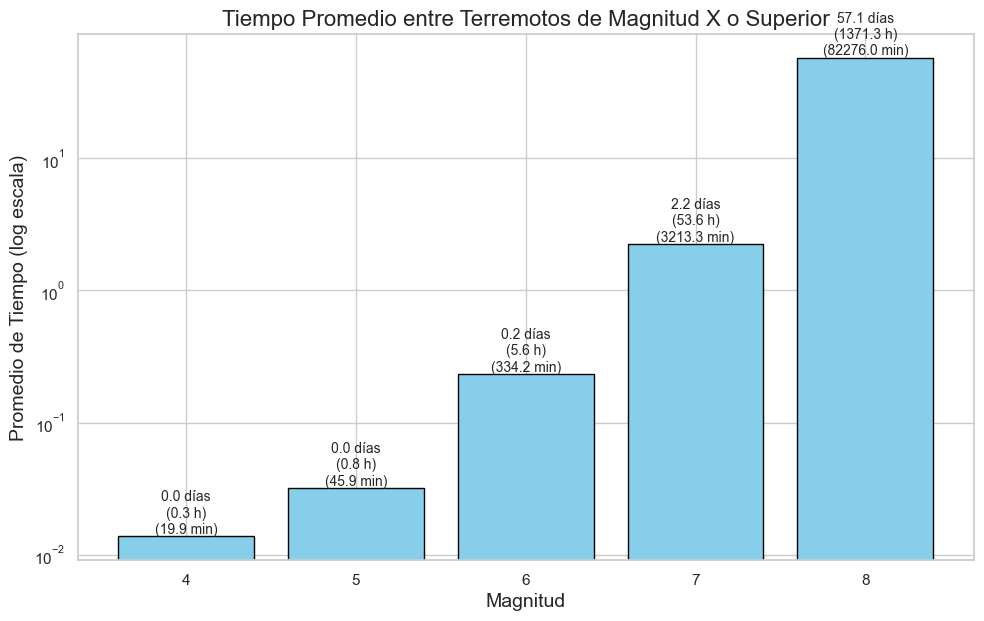

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fechas esté en formato datetime
df['Date & Time UTC'] = pd.to_datetime(df['Date & Time UTC'])  # Convertir la columna a formato datetime

# Lista de magnitudes a analizar
magnitudes = [4, 5, 6, 7, 8]

# Diccionario para almacenar los resultados
promedios_tiempo = {}

# Calcular el tiempo promedio entre terremotos para cada magnitud
for mag in magnitudes:
    # Filtrar terremotos con magnitud >= mag
    df_filtrado = df[df['Magnitude'] >= mag].sort_values(by='Date & Time UTC')
    
    # Calcular las diferencias de tiempo entre terremotos consecutivos
    diferencias = df_filtrado['Date & Time UTC'].diff().dt.total_seconds() / (60 * 60 * 24)  # Convertir a días
    
    # Calcular el promedio de las diferencias (ignorando NaN)
    promedio = diferencias.mean()
    promedios_tiempo[mag] = promedio

# Crear un DataFrame con los resultados
resultados = pd.DataFrame(list(promedios_tiempo.items()), columns=['Magnitud', 'Promedio (días)'])

# Graficar los resultados
plt.figure(figsize=(10, 7))
bars = plt.bar(resultados['Magnitud'], resultados['Promedio (días)'], color='skyblue', edgecolor='black')

# Ajustar la escala del eje Y para mejorar la visualización
plt.yscale('log')  # Escala logarítmica para mostrar mejor los valores pequeños y grandes

# Agregar etiquetas con los valores promedio en días, horas y minutos
for bar, promedio in zip(bars, resultados['Promedio (días)']):
    dias = promedio
    horas = promedio * 24
    minutos = promedio * 24 * 60
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X
        bar.get_height() + 0.,  # Posición Y (altura de la barra + un pequeño desplazamiento)
        f"{dias:.1f} días\n({horas:.1f} h)\n({minutos:.1f} min)",  # Texto a mostrar
        ha='center', va='bottom', fontsize=10
    )

# Configurar el título y las etiquetas
plt.title('Tiempo Promedio entre Terremotos de Magnitud X o Superior', fontsize=16)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Promedio de Tiempo (log escala)', fontsize=14)
plt.xticks(resultados['Magnitud'])

# Ajustar los márgenes para evitar superposición
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.subplots_adjust(top=0.85)  # Aumenta el espacio superior si es necesario

# Mostrar la gráfica
plt.show()

##### Este grafico apunta a que el promedio de intervalos a medida que aumenta la magnitud sigue una progresión. Para Comprobar que tipo de progresion sigue, podemos probar marios modelos y ver cual se ajusta más.
##### Probaremos tres modelos: uno lineal, uno polinómico y uno exponencial.

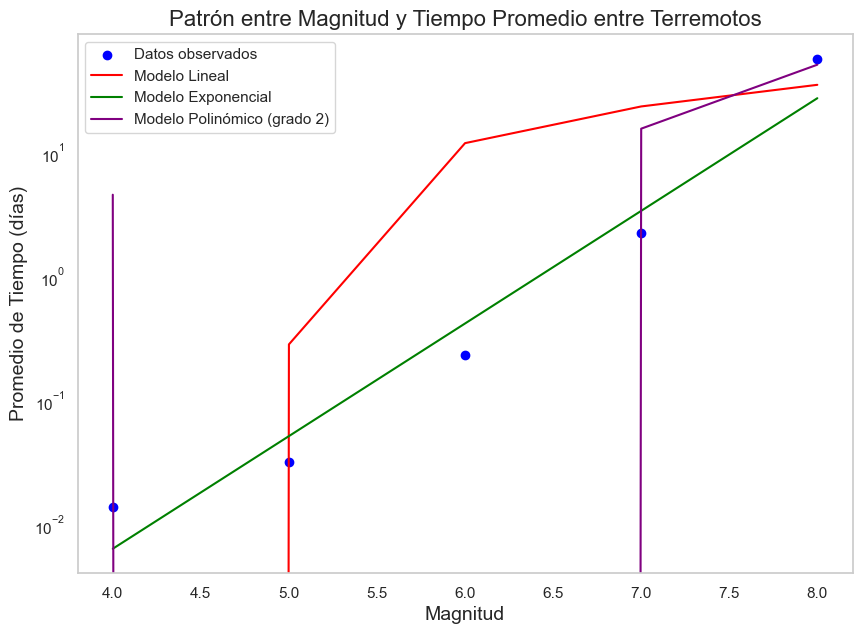

Modelo Lineal: y = 11.64 * Magnitud + -57.94
Modelo Exponencial: y = exp(2.09 * Magnitud + -13.41)
Modelo Polinómico: y = 7.97 * Magnitud^2 + -83.99 * Magnitud + 213.02


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Datos de magnitudes y sus intervalos promedio
X = resultados['Magnitud'].values.reshape(-1, 1)  # Magnitudes como variable independiente
y = resultados['Promedio (días)'].values  # Intervalos promedio como variable dependiente

# Ajuste de un modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)
prediccion_lineal = modelo_lineal.predict(X)

# Ajuste de un modelo exponencial (log-transformación)
modelo_exponencial = LinearRegression()
modelo_exponencial.fit(X, np.log(y))  # Ajustar el logaritmo de y
prediccion_exponencial = np.exp(modelo_exponencial.predict(X))  # Convertir de logaritmo a escala original

# Ajuste de un modelo polinómico (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_poly, y)
prediccion_polinomica = modelo_polinomico.predict(X_poly)

# Graficar los datos y los modelos
plt.figure(figsize=(10, 7))
plt.scatter(resultados['Magnitud'], resultados['Promedio (días)'], color='blue', label='Datos observados')

# Graficar los modelos
plt.plot(resultados['Magnitud'], prediccion_lineal, color='red', label='Modelo Lineal')
plt.plot(resultados['Magnitud'], prediccion_exponencial, color='green', label='Modelo Exponencial')
plt.plot(resultados['Magnitud'], prediccion_polinomica, color='purple', label='Modelo Polinómico (grado 2)')

# Configurar el gráfico
plt.title('Patrón entre Magnitud y Tiempo Promedio entre Terremotos', fontsize=16)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Promedio de Tiempo (días)', fontsize=14)
plt.yscale('log')  # Escala logarítmica para el eje Y
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

# Mostrar coeficientes de los modelos
print("Modelo Lineal: y = {:.2f} * Magnitud + {:.2f}".format(modelo_lineal.coef_[0], modelo_lineal.intercept_))
print("Modelo Exponencial: y = exp({:.2f} * Magnitud + {:.2f})".format(modelo_exponencial.coef_[0], modelo_exponencial.intercept_))
print("Modelo Polinómico: y = {:.2f} * Magnitud^2 + {:.2f} * Magnitud + {:.2f}".format(
    modelo_polinomico.coef_[2], modelo_polinomico.coef_[1], modelo_polinomico.intercept_))

#### Con un simple vistazo vemos como el modelo exponencial es, con diferencia, el que mejor se ajusta a los datos y podemos concluir que, a medida que aumenta la magnitud de un terremoto, el tiempo hasta otro terremoto igual o superor aumenta de forma exponencial.